# Gaussian Mechanism Basics #

The Gaussian Mechanism adds noise drawn from a Gaussian (normal) distribution to realize $(\epsilon, \delta)$ differential privacy.

This mechanism has better performance for vector-valued queries than the Laplace Mechanism (queries that return many data points per individual at once).

This notebook walks through the basic `eeprivacy` functions for working with the Gaussian Mechanism.

In [4]:
# Preamble: imports and figure settings

from eeprivacy import (
  gaussian_mechanism_epsilon_for_confidence_interval,
  gaussian_mechanism_confidence_interval,
  gaussian_mechanism,
)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

np.random.seed(1234) # Fix seed for deterministic documentation

mpl.style.use("seaborn-white")

MD = 28
LG = 36
plt.rcParams.update({
    "figure.figsize": [25, 10],
    "legend.fontsize": MD,
    "axes.labelsize": LG,
    "axes.titlesize": LG,
    "xtick.labelsize": LG,
    "ytick.labelsize": LG,
})

## Distribution of Gaussian Mechanism Outputs ##

For a given ε, noise is drawn from the normal distribution at $\sigma^2 = \frac{2s^2 \log(1.25/\delta)}{\epsilon^2}$. The `eeprivacy` function `gaussian_mechanism` draws this noise and adds it to a private value:


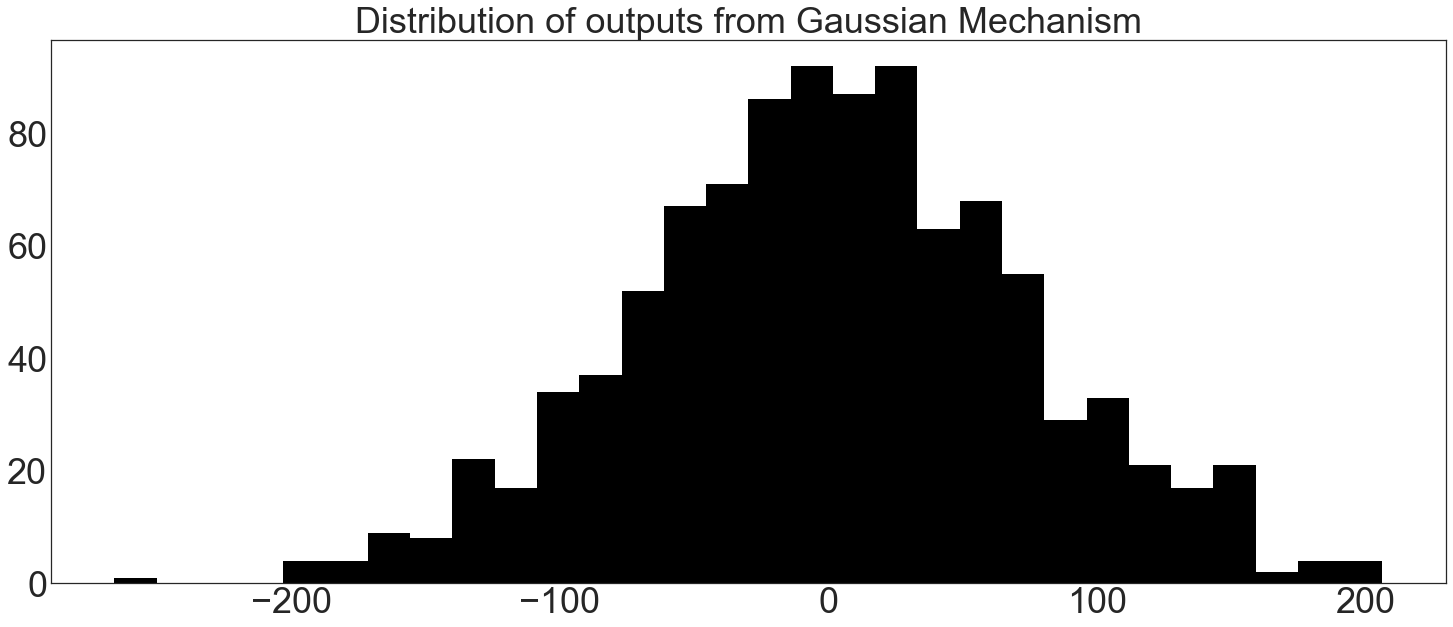

In [5]:
trials = []
for t in range(1000):
  trials.append(gaussian_mechanism(
    value=0,
    epsilon=0.1,
    delta=1e-12,
    sensitivity=1
  ))

plt.hist(trials, bins=30, color="k")
plt.title("Distribution of outputs from Gaussian Mechanism")
plt.show()

## Gaussian Mechanism Confidence Interval ##

With the `eeprivacy` confidence interval functions, analysts can determine how far away the true value of a statistics is from the differentially private result.

To determine the confidence interval for a given choice of privacy parameters, employ `eeprivacy.gaussian_mechanism_confidence_interval`.

To determine the privacy parameters for a desired confidence interval, employ `eeprivacy.gaussian_mechanism_epsilon_for_confidence_interval`.

The confidence intervals reported below are two-sided. For example, for a 95% confidence interval of +/-10, 2.5% of results will be smaller than -10 and 2.5% of results will be larger than +10.

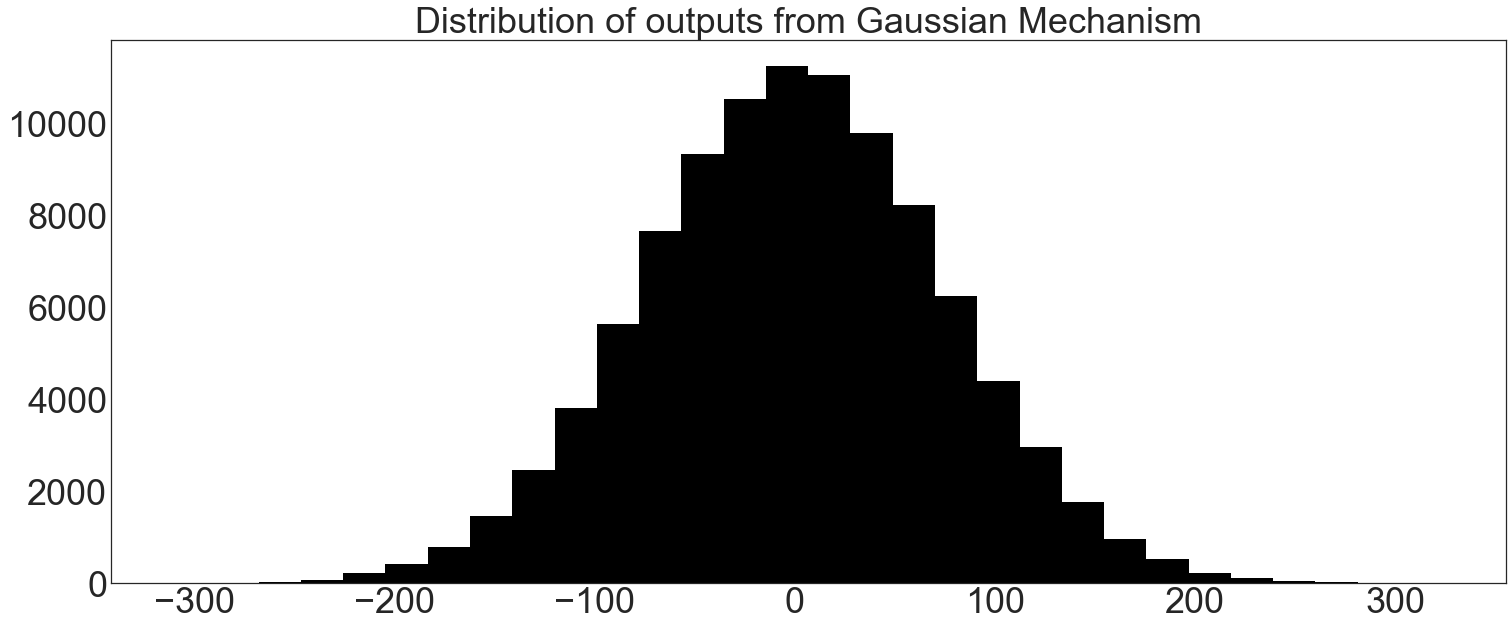

95% Confidence Interval (Stochastic): 146.66143777835057
95% Confidence Interval (Exact): 146.28781668617955
ε for confidence interval: 0.09999987468977604


In [9]:
trials = []
for t in range(100000):
  trials.append(gaussian_mechanism(
    value=0,
    epsilon=0.1,
    delta=1e-12,
    sensitivity=1
  ))

plt.hist(trials, bins=30, color="k")
plt.title("Distribution of outputs from Gaussian Mechanism")
plt.show()

ci = np.quantile(trials, 0.975)
print(f"95% Confidence Interval (Stochastic): {ci}")

ci = gaussian_mechanism_confidence_interval(
  epsilon=0.1,
  delta=1e-12,
  sensitivity=1,
  confidence=0.95
)
print(f"95% Confidence Interval (Exact): {ci}")

# Now in reverse:
epsilon = gaussian_mechanism_epsilon_for_confidence_interval(
  target_ci=146.288,
  delta=1e-12,
  sensitivity=1,
  confidence=0.95
)
print(f"ε for confidence interval: {epsilon}")